# 神经网络编程介绍

庞龙刚@华中师范大学

机器学习是一种新的编程模式。这种模式先假设任何输入 x 与输出 y 之间存在连续几何变换，
其函数形式可用 $y= f(x, \theta)$ 表示, 其中 $\theta$ 是函数参数。

机器学习通过逐步微调函数参数 $\theta$的方式，试图最小化模型预言 $\hat{y}$ 与真实标签 $y$的差别。
此差别最简单的数学表达式是 MAE 或者 MSE，即
$$L(\theta) = |\hat{y} - y|$$
或
$$L(\theta) = |\hat{y} - y|^2$$

总结机器学习（神经网络）的训练过程：

1. 初始化参数
2. 选择优化算法 (SGD, Momentum, RMSProp, Adam, ...)
3. 重复下列步骤
    - 对给定的输入 x, 计算神经网络输出 $y=f(x, \theta)$
    - 计算损失函数，$L(\theta) = {\rm distance}(y, y_{\rm true})$
    - 计算损失函数对参数 $\theta$ 的负梯度 $-\partial L / \partial \theta$
    - 根据优化算法，使用负梯度更新神经网络参数 $\theta$

## n 个输入，m 个输出的单层人工神经网络

\begin{align}
h &= \sigma(x_n W_{nm} + b_m) \\
  & = \sigma \left( \begin{bmatrix} x_0, x_1, x_2, \cdots, x_{n-1} \end{bmatrix} 
\begin{bmatrix} w_{00}& w_{01} & w_{02} & \cdots & w_{0, m-1} \\ 
                w_{10}& w_{11} & w_{12} & \cdots & w_{1, m-1} \\ 
                w_{20}& w_{21} & w_{22} & \cdots & w_{2, m-1} \\ 
                \cdots & \cdots & \cdots & \cdots & \cdots \\ 
                w_{n-1,0}& w_{n-1,1} & w_{n-1, 2} & \cdots & w_{n-1, m-1}
\end{bmatrix}
 + \begin{bmatrix} b_0, b_1, b_2, \cdots, b_{m-1} \end{bmatrix} \right)\\
\end{align}

其中 $\sigma(\cdot)$ 是非线性激活函数，作用在输出向量的每一个元素上。

一个人工神经元也可以等价的定义成如下形式。
 
 \begin{align}
h = \sigma(W^T x + b) = \sigma\left(\begin{bmatrix} w_{00}& w_{01} & w_{02} & \cdots & w_{0, m-1} \\ 
                w_{10}& w_{11} & w_{12} & \cdots & w_{1, m-1} \\ 
                w_{20}& w_{21} & w_{22} & \cdots & w_{2, m-1} \\ 
                \cdots & \cdots & \cdots & \cdots & \cdots \\ 
                w_{n-1,0}& w_{n-1,1} & w_{n-1, 2} & \cdots & w_{n-1, m-1}\end{bmatrix}^T
\begin{bmatrix} x_0\\ x_1\\ x_2\\ \cdots\\ x_{n-1} \end{bmatrix} + \begin{bmatrix} b_0\\ b_1\\ b_2\\ \cdots\\ b_{m-1} \end{bmatrix} \right)
\end{align}

此时 $x$ 及 $b$ 写成 n 维列向量，$W$ 需要转置。

神经网络的参数(W，b 矩阵的矩阵元)初始化为随机数，此时神经网络作出随机预测。

在猫狗分类时，一开始神经网络可以把猫分类成狗，把狗分类成猫。

只有经过学习，即通过随机梯度下降，实现误差的向后传递，逐渐更新神经网络的参数，神经网络才能慢慢作出正确的预测结果。

这里我们先实现一个“混乱大脑”，作出随机响应的人工神经网络，此网络只有两层，输入层与输出层。

注意，初始化过程并不随意，这里有一篇很好的文章讲为何参数初始化可以防止梯度消失和梯度爆炸 [deeplearning.ai](http://www.deeplearning.ai/ai-notes/initialization/?utm_source=email&utm_medium=newsletter&utm_campaign=BlogAINotesInTextMay082019)

比如，如果使用 tanh 激活函数，经常使用 Xavier 初始化神经网络的参数。如果使用 relu 激活函数，经常使用 He 初始化。

Xavier 初始化方案如下，

\begin{align}
W^{[l]} &= \mathcal{N}(\mu=0, \sigma^2 = {1 \over \sqrt{n^{[l-1]}}}) \\
b^{[l]} &= 0
\end{align}

即第 l 层的权重矩阵元 $W^{[l]}$ 要满足均值为 0， 方差为 $1 \over \sqrt{n^{[l-1]}}$ 的正态分布。
第 l 层的偏置矩阵 $b^{[l]}$ 的矩阵元全部初始化为 0。


## 简单的测试用激活函数

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import seaborn as sns
from ipywidgets import *
import math

sns.set_context('paper', font_scale=2)
sns.set_style('ticks')

to_html = False

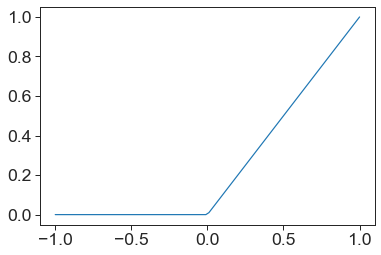

In [2]:
def relu(x):
    ''' 简单的 relu 激活函数
    :x: np.array type
    :return: relu activation function'''
    return np.maximum(x, 0)


x = np.linspace(-1, 1, 100)
plt.plot(x, relu(x))

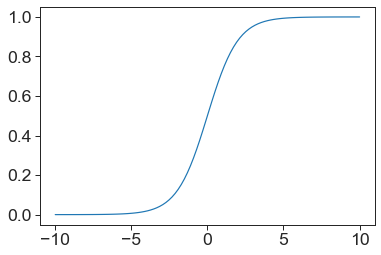

In [3]:
def sigmoid(z):
    ''' 简单的 sigmoid 激活函数
    :z: np.array type
    :return: sigmoid activation function'''
    return 1 / (1 + np.exp(-z))

x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))

## 单层人工神经网络

输入是长度为 n 的行向量 x，输出为长度为 m 的行向量 z

```python
z = one_layer(x, num_neurons = m, activation = relu)
```

如何编程实现？

In [4]:
def one_layer(x, num_neurons, activation):
    '''x: 1D np.array, 输入向量
    :num_neurons: 神经元个数
    :activation: 激活函数，比如 Relu, sigmoid
    :return: 1D np.array, 元素个数 = num_neurons'''
    n = len(x)
    m = num_neurons
    # n 行 m 列 的随机数
    W = 2 * np.random.rand(n, m) - 1
    b = np.random.rand(m)
    # x@W 计算 x 点乘 W
    z = x@W + b
    return activation(z)

In [5]:
x = np.array([1, 1, 1])

one_layer(x, num_neurons=1, activation=relu)

array([0.79340614])

## 多隐藏层人工神经网络

In [6]:
def multi_layers(x, neurons_per_layer, activation):
    '''x: 1D np.array, 输入向量
    :neurons_per_layer: 每层神经元个数，列表，例：[64, 32, 32]
    :activation: 激活函数
    :return: 随机化的多层人工神经网络'''
    z = x
    for m in neurons_per_layer:
        z = one_layer(z, m, activation=activation)
    
    return z

# 输入 x 为 n=3 的行向量
x = np.array([1, 1, 1])
# 此神经网络有 4 层，每一层分别有 64, 32, 32, 4 个神经元
neurons_per_layer = [64, 32, 32, 4]
# 输出结果为 4 维行向量
multi_layers(x, neurons_per_layer, relu)

array([ 0.        , 17.13846345,  0.        , 29.37243935])

## 神经网络如何学习:随机梯度下降

神经网络训练是一个优化过程，目标是更新模型参数，以最小化损失函数。

误差的向后传递依赖随机梯度下降

\begin{align}
\theta = \theta - \epsilon {\partial L \over \partial \theta}
\end{align}

其中 ${\partial L \over \partial \theta}$ 由我们之前介绍过的自动微分实现，$\epsilon$ 是学习率（一个很小的正数，一般为超参数）。

在构建神经网络时，损失函数对参数 $\theta$ 的依赖已经内建在计算图中，每一步计算都保存了损失函数对参数的自动微分。

为了最小化误差 $L(\theta)$, 我们只需要计算误差对参数 $\theta$ 的梯度，通过链式规则，
将误差反向传递到 $\theta$, 并使用梯度下降，更新$\theta$ 即可。

如果增加 $\theta$, 损失函数 $L(\theta)$ 增大，那么损失函数对参数$\theta$的梯度为正数, 即 $\nabla_{\theta} L(\theta) > 0$,
只要将 $\theta$ 减去一个正数 $\eta \cdot \nabla_{\theta} L(\theta)$ 即可使损失函数减小。
 其中 $\eta$ 是学习率 (Learning Rate, 简写为 lr)，为一个很小的正数。
 
如果增加 $\theta$, 损失函数 $L(\theta)$ 变小，那么 $\nabla_{\theta} L(\theta) < 0$,
将 $\theta$ 减去一个负数 $\eta \cdot \nabla_{\theta} L$ 同样可使损失函数减小。
你发现无论梯度是正是负，只要将参数减去学习率乘以梯度，总可以将损失降低。

这就是梯度下降的原理！

此处我们用一些简单的动画演示梯度下降的原理。

假设损失函数对参数 $\theta$的函数为，$L(\theta) = \theta^2$,

In [7]:
def loss_function(theta):
    '''举例：简单的损失函数 L = theta^2 '''
    return theta**2

def negative_gradient(theta):
    '''损失函数对参数的负梯度'''
    return - 2 * theta

In [8]:
def gradient_descent(lr=0.1):
    ''''''
    nsteps = 20
    theta = np.linspace(-1.5, 1.5, 100)
    loss = loss_function(theta)
    plt.plot(theta, loss)
    theta_i = 1
    history = [theta_i] 
    # 记录训练过程中参数每一次更新后的值
    for n in range(nsteps):
        theta_i = theta_i + lr * negative_gradient(theta_i)
        history.append(theta_i)
    
    history = np.array(history)
    fi = loss_function(history)
    plt.plot(history, fi, 'ro-')
    plt.xlim(-1.5, 1.5)
    plt.ylim(-0.2, 2)

In [9]:
# 输出成网页时 interact() 插件不工作，定义 to_html 跳过
# 网页版看到 to_html 的语句一般指 jupyter notebook 中可以交互的代码

if not to_html:
    interact(gradient_descent(lr=0.1), lr=(0.1, 2, 0.1))

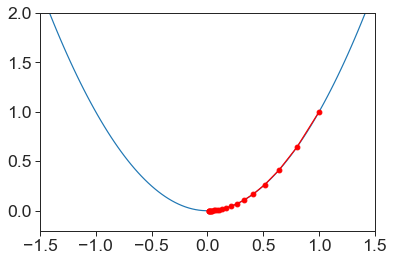

In [10]:
gradient_descent(lr=0.1)

# 学习率比较小，可以成功找到极小值点

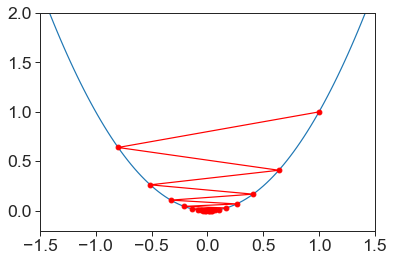

In [11]:
gradient_descent(lr=0.9)

# 学习率比较大，参数左右跳动，表现为训练、验证误差震荡

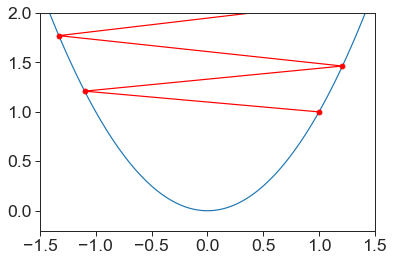

In [12]:
gradient_descent(lr=1.05)

# 学习率太大，导致发散

## 二维情况下的梯度下降

参数 $x_1, x_2$

损失函数 

\begin{align}
L(x_1, x_2) = 0.1 x_1^2 + 2 x_2^2
\end{align}

优化目标: 寻找 $x_1$, $x_2$ 使得损失函数 $L(x_1, x_2)$ 最小

下面这个Cell定义了4个函数，

1. f_2d(x1, x2) 定义简单的 2 维函数，$f(x_1, x_2) = 0.1 x_1^2 + 2x_2^2$. 
2. f_grad(x1, x2) 计算 f_2d() 沿两个方向的梯度
3. train_2d() 函数使用给用的梯度下降算法，迭代50步，返回更新历史
4. plot_2d() 函数画出 f_2d 函数的等高图以及50步更新轨迹

In [13]:
# 定义损失函数，损失函数的梯度以及训练过程
def f_2d(x1, x2):
    '''original function to minimize'''
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

def f_grad(x1, x2):
    '''the gradient dfdx1 and dfdx2'''
    dfdx1 = 0.2 * x1
    dfdx2 = 4 * x2
    return dfdx1, dfdx2

def train_2d(trainer, lr):
    """Train a 2d object function with a customized trainer"""
    x1, x2 = -5, -2
    s_x1, s_x2 = 0, 0
    res = [(x1, x2)]
    for i in range(50):
        # trainer 可以是 SGD, Momentum, RMSProp, Adam 等
        x1, x2, s_x1, s_x2, lr = trainer(x1, x2, s_x1, s_x2, lr)
        res.append((x1, x2))
    return res

In [14]:
def plot_2d(res, figsize=(10, 6), title=None):
    x1_, x2_ = zip(*res)
    fig = plt.figure(figsize=figsize)
    plt.plot([0], [0], 'r*', ms=15)
    plt.text(0.0, 0.25, 'minimum', color='w')
    # 绘制开始位置
    plt.plot(x1_[0], x2_[0], 'ro', ms=10)
    plt.text(x1_[0]+0.1, x2_[0]+0.2, 'start', color='w')
    plt.plot(x1_, x2_, '-o', color='#ff7f0e')
    # 绘制结束位置
    plt.plot(x1_[-1], x2_[-1], 'wo')
    plt.text(x1_[-1], x2_[-1]-0.25, 'end', color='w')
    # 绘制训练过程动画的背景：0.1*x1**2 + 2*x2**2 等高图
    x1 = np.linspace(-5.5, 3, 50)
    x2 = np.linspace(min(-3.0, min(x2_) - 1), max(3.0, max(x2_) + 1), 100)
    x1, x2 = np.meshgrid(x1, x2)
    plt.contourf(x1, x2, f_2d(x1, x2), cmap=cm.gnuplot)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.show()


## 原始的梯度下降算法 SGD


$$\theta = \theta - \eta \cdot \nabla_{\theta} L(\theta)$$

In [15]:
def sgd(x1, x2, s1, s2, lr):
    '''随机梯度下降 sgd
    :(x1, x2): 当前位置
    :(s1, s2): 当前速度，动量机制使用'''
    dfdx1, dfdx2 = f_grad(x1, x2)
    return (x1 - lr * dfdx1, x2 - lr * dfdx2, 0, 0, lr)

def visualize_gradient_descent(lr=0.05):
    '''可视化随机梯度下降学习过程'''
    res = train_2d(sgd, lr)
    plot_2d(res, title='SGD')

In [16]:
if not to_html:
    interact(visualize_gradient_descent, lr=(0, 1, 0.001))

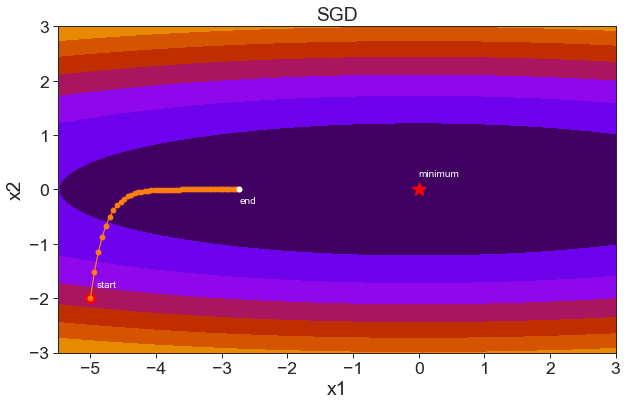

In [17]:
#原始 SGD，学习率(Learning Rate 简称 lr) 过小的话，在有限步内很难走到极小值点。
visualize_gradient_descent(lr=0.06)

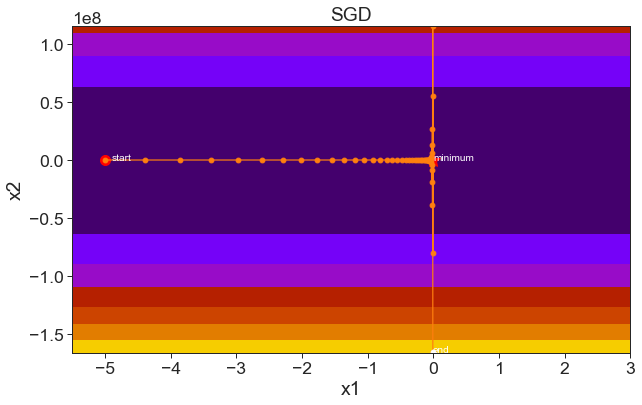

In [18]:
# 原始 SGD，学习率 lr 稍大，就会造成剧烈震荡。
# 表现为训练过程中出现 NaN（Not a Number)，
# 或者训练误差随训练 Epoch 的增加而增加的情况。
visualize_gradient_descent(lr=0.61)

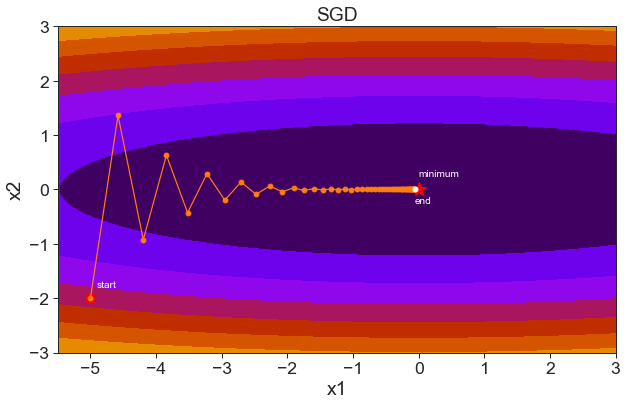

In [19]:
# 学习率 lr 如果选取合适，SGD会成功到达极小值点。
# 但想要选中比较合适的学习率，比较困难。
# 这也是为什么大家都很喜欢用对学习率不敏感的梯度下降算法，比如 Adam。
# 在这个例子中，虽然 SGD 初期会沿着最速下降方向（即梯度更大的方向）剧烈震荡，但最终很好的收敛到极小值附近。
visualize_gradient_descent(lr=0.42)

## 动量机制 SGD + Momentum

SGD 的第一个缺点是步长不好选择。选择大了容易发散，选择小了训练速度很慢，训练到地老天荒。 SGD 的第二个缺点是当梯度为0时，SGD也就停止更新，这使得它很容易停在鞍点（一阶梯度为0，Hessian矩阵的特征值有正有负），或者局域极小值点。 原始的随机梯度下降等价于用**加速度来更新位置**，而物理学家喜欢用**加速度来更新速度，用速度来更新位置**。 动量机制(Momentum)可以帮助克服这几个缺点。 

在动量机制下，就算一开始的学习率比较小， 因为速度v是加速度（梯度）的逐步累加，所以参数更新很快。如果加速度与速度的方向相反，SGD下的小球会立刻改变方向，而动量机制下小球会先减速， 改变方向后再加速，减少剧烈震荡。如果某点梯度为零，SGD下参数会立刻停止更新，就算那个点是局部极小值或鞍点，而动量机制下就算梯度为零，加速度为零，但因为小球有惯性，会有一定的几率逃出局部极小值或鞍点。

**带动量的梯度下降**

\begin{align}
v_t &= \gamma v_{t-1} + \eta \cdot \nabla_{\theta} L(\theta) \\
\theta &= \theta - v_t
\end{align}

用梯度（加速度）更新速度，用速度更新位置。

In [20]:
def momentum(x1, x2, v1, v2, lr, gamma):
    '''带动量机制的 SGD 算法的实现'''
    dfdx1, dfdx2 = f_grad(x1, x2)
    v1 = gamma * v1 + lr * dfdx1
    v2 = gamma * v2 + lr * dfdx2
    x1 = x1 - v1
    x2 = x2 - v2
    return (x1, x2, v1, v2, lr)

In [21]:
def visualize_sgd_momentum(lr=0.1, gamma=0.1):
    '''lr: learning rate
    gamma: parameter for momentum sgd'''  
    trainer = lambda x1, x2, v1, v2, lr: momentum(x1, x2, v1, v2, lr, gamma)
    res = train_2d(trainer, lr)
    plot_2d(res, title='momentum')

In [22]:
if not to_html:
    interact(visualize_sgd_momentum,
         lr=(0, 0.99, 0.01), 
         gamma=(0, 0.99, 0.01),
         continuous_update=False)

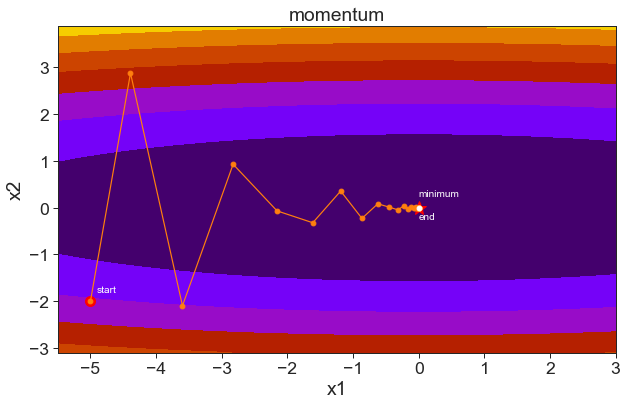

In [23]:
#不加动量之前，学习率 lr=0.61 时，损失函数已经发散。
#加入动量之后，同样的学习率，系统却能正确找到极小值点。
#中等大小的动量，可以帮助系统免疫震荡。
visualize_sgd_momentum(lr=0.61, gamma=0.42)

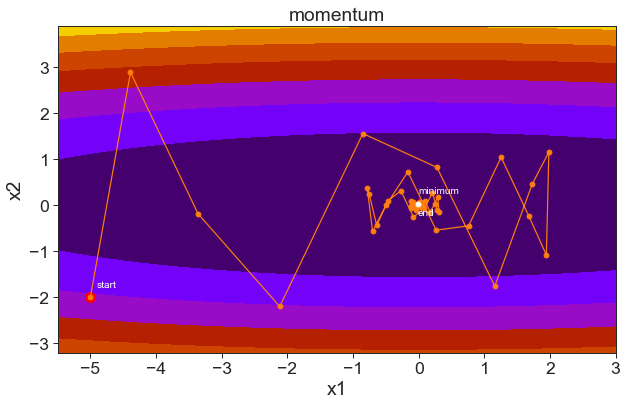

In [24]:
#同样大的学习率，继续增加动量 beta 到 0.81，则会引入新的震荡。
#https://distill.pub/ 上有篇研究动量机制的文章，清楚的说明动量会消除某些震荡，也会引入新的震荡。
#削弱的是小球滚下山坡时沿最速下降方向的震荡，引入的是小球在V形谷底附近因惯性导致的左右摇摆。
visualize_sgd_momentum(lr=0.61, gamma=0.81)

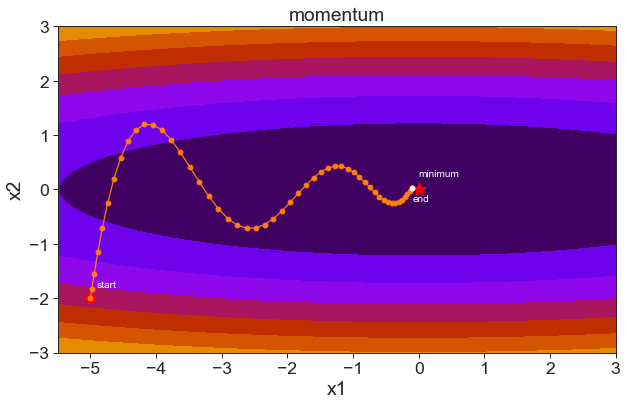

In [25]:
# 一般的做法是选择大的动量 (beta=0.9)，和小的学习率 (此例子中 lr = 0.02)，以使带动量的 SGD 快速稳定收敛。
# 为了在给定步数内成功到达极小值点，我们在在原始的 SGD 中选择 lr=0.42。
# 作为对比，这里加了动量之后的SGD的学习率(lr=0.02)要远小于原始SGD的lr。说明动量可以加速收敛。
visualize_sgd_momentum(lr=0.02, gamma=0.91)

## Adagrad 自适应调整的梯度下降

SGD 的另一个缺点是步长对各个方向都是同一个常数。这就导致在梯度大的方向更新快，梯度小的方向更新慢。引起在梯度大的方向的剧烈震荡。适配步长算法对更新快的方向使用小学习率，更新慢的方向使用大学习率，实现更光滑的更新。

$$ g_t =  \nabla_{\theta} L(\theta)$$

$$ G = \sum_{t} g_t^2$$

$$\theta = \theta - \frac{\eta}{\sqrt{G + \epsilon}} \cdot g_t$$

其中 G 是个对角矩阵，第j个对角元对应 θ 第j个方向梯度平方从初始到时刻 t 的累积。 

因为 G 随时间逐渐增大，有效学习率在后期会衰减为 0。

In [26]:
def visualize_adagrad(lr=0.1):
    '''lr: learning rate'''
    def adagrad_2d(x1, x2, s1, s2, lr):
        g1, g2 = f_grad(x1, x2)
        eps = 1e-6
        s1 += g1 ** 2
        s2 += g2 ** 2
        x1 -= lr / math.sqrt(s1 + eps) * g1
        x2 -= lr / math.sqrt(s2 + eps) * g2
        return x1, x2, s1, s2, lr
    
    res = train_2d(adagrad_2d, lr)
    plot_2d(res, title='adagrad')

In [27]:
if not to_html:
    interact(visualize_adagrad,
          lr=(0, 4, 0.01),
          continuous_update=False)

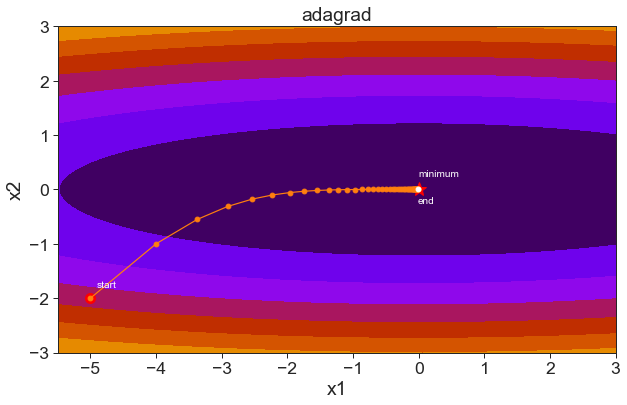

In [28]:
# Adagrad 需要比较大的学习率才能在给定步内走到极小值点。原因是Adagrad是适配学习率算法。
# 它对频繁更新的权重使用小的学习率，对比较稀疏，更新较少的权重使用大的学习率。
# 算法累积每个参数的历史梯度平方，将其作为学习率衰减因子。可以看到后期更新点基本重合，意味着更新缓慢。
visualize_adagrad(lr=1.0)

## RMSProp 

Adagrad 比较激进，G 从开始累积到时刻 t, 导致有效学习率随时间增大而持续变小。为了消除这种梯度消失，Adadelta 与 RMSProp 使用滑动平均，来对有限时间窗口计算。

$$ g = \nabla_{\theta} L(\theta) $$

$$ E\left[g^2\right] = \gamma E\left[g^2\right] + (1-\gamma) g^2 $$

$$\theta = \theta - \frac{\eta}{\sqrt{E\left[g^2\right] + \epsilon}} \cdot g$$

$E\left[g^2\right]$ 是梯度平方的滑动平均，等价于较小时间窗口内梯度的累积。 这是RMSProp算法。Adadelta算法的思路与RMSProp一致。

In [29]:

def visualize_rmsprop(lr=0.1, gamma=0.9):
    '''lr: learning rate, 
       gamma: momentum'''  
    def rmsprop_2d(x1, x2, s1, s2, lr):
        eps = 1e-6
        g1, g2 = f_grad(x1, x2)
        s1 = gamma * s1 + (1 - gamma) * g1 ** 2
        s2 = gamma * s2 + (1 - gamma) * g2 ** 2
        x1 -= lr / math.sqrt(s1 + eps) * g1
        x2 -= lr / math.sqrt(s2 + eps) * g2
        return x1, x2, s1, s2, lr

    res = train_2d(rmsprop_2d, lr)
    plot_2d(res, title='rmsprop')

In [30]:
if not to_html:
    interact(visualize_rmsprop,
     lr=(0, 1, 0.001), 
     gamma=(0, 0.99, 0.001),
     continuous_update=False)

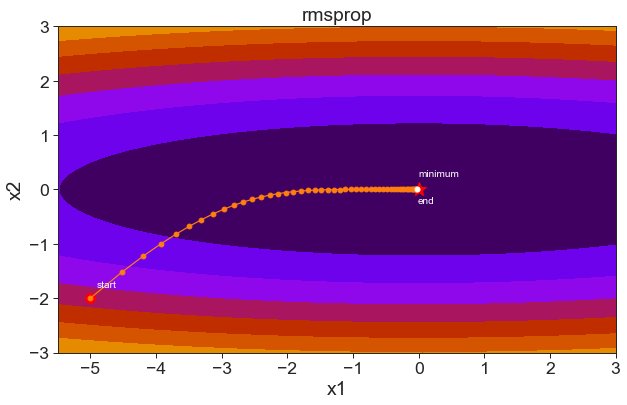

In [31]:
# RMSProp 算法集成了动量机制与 Adagrad 两种算法的优点。
# 可以看到与 Adagrad 结果相比，RMSProp的更新点分布更加均匀，
# 可以使用更小的学习率 (lr=0.15) 在给定步到达极小值点，学习率后期衰减不严重。
# 另一方面，与单纯的带动量的SGD 比，它的更新曲线比较平滑，震荡较小。
visualize_rmsprop(lr=0.15, gamma=0.9)

## Adam

动量机制与适配步长是两种完全不同的思路，Adam 将两者的优点合二为一。

\begin{align}
\theta = \theta - \frac{\eta}{\sqrt{\hat{n}} + \epsilon} \hat{m}
\end{align}

其中 m 是梯度的滑动平均，n 是梯度平方的滑动平均。因为两个 $\beta$ 值默认比较接近1，初始时刻m，n都偏向0, 因此使用 $\hat{m}$ 和 $\hat{n}$ 加以修正。

\begin{align}
g & = \nabla_{\theta} L(\theta), \\
m &= \beta_1 m + (1 - \beta_1) g, \quad\;
n = \beta_2 n + (1 - \beta_2) g^2 \\
\hat{m} &= \frac{m}{(1 - \beta_1^t)}, \quad\;\quad\;\quad\;
\hat{n} = \frac{n}{(1 - \beta_2^t)}
\end{align}


In [32]:
def adam_core(lr, m, n, g, t, beta1, beta2):
    '''Adam 优化算法的核心'''
    eps = 1.0E-6
    m = beta1 * m + (1 - beta1) * g
    n = beta2 * n + (1 - beta2) * g*g
    m_hat = m / (1 - beta1**t)
    n_hat = n / (1 - beta2**t)
    dx = lr * m_hat / (math.sqrt(n_hat) + eps)
    return m, n, dx

In [33]:
def visualize_adam(lr=0.1, beta1=0.9, beta2=0.999):
    ''' 可视化 Adam 优化算法的学习过程
    lr: learning rate
    beta1: parameter for E(g)
    beta2: parameter for E(g^2)
    '''    
    def adam_2d(x1, x2, m1, n1, m2, n2, lr, t):
        '''m1, m2: E(g1), E(g2)
           n1, n2: E(g1^2), E(g2^2) where E() is expectation
           lr: learning rate
           t: time step'''
        eps = 1e-6
        g1, g2 = f_grad(x1, x2)
        m1, n1, dx1 = adam_core(lr, m1, n1, g1, t, beta1, beta2)
        m2, n2, dx2 = adam_core(lr, m2, n2, g2, t, beta1, beta2)       
        x1 -= dx1
        x2 -= dx2
        return x1, x2, m1, n1, m2, n2, lr
    
    def train_adam(trainer, lr):
        """Train a 2d object function with a customized trainer"""
        x1, x2 = -5, -2
        m1, n1, m2, n2 = 0, 0, 0, 0
        res = [(x1, x2)]
        for i in range(30):
            x1, x2, m1, n1, m2, n2, lr = trainer(x1, x2, m1, n1, m2, n2, lr, i+1)
            res.append((x1, x2))
        return res
    
    res = train_adam(adam_2d, lr)
    plot_2d(res, title='adam')

In [34]:
if not to_html:
    interact(visualize_adam,
          lr=(0, 1, 0.01), 
          beta1=(0, 0.99, 0.01),
          beta2=(0, 0.99, 0.01),
          continuous_update=False)

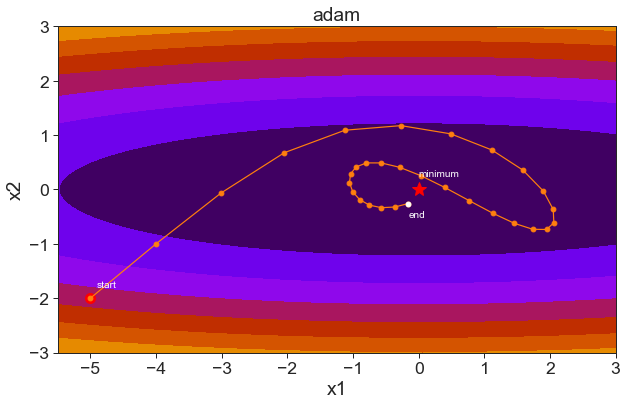

In [35]:
# 使用 Adam 文章里推荐的默认参数，可以看到就算选择了非常大的学习率 (lr = 1)，
# Adam 的更新轨迹也只是围绕极小值点附近做S形环绕，而不是像原始SGD，带动量的SGD或其他算法一样直接发散。
# 与手动选好学习率的带动量的 SGD 相比，Adam 在极小值点附近表现出复杂的非单调行为。
visualize_adam(lr=1, beta1=0.9, beta2=0.99) 

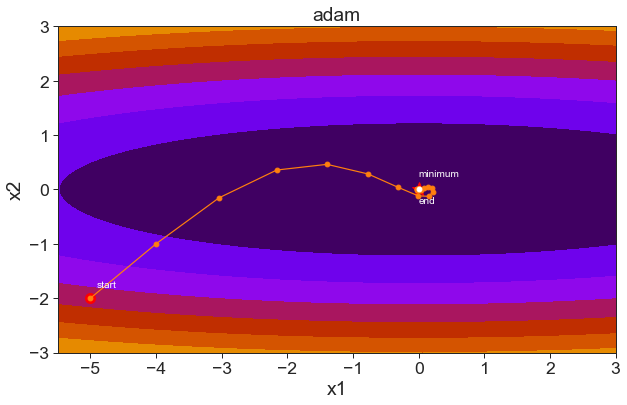

In [36]:
# 减小第一个参数 mu，会缩小极小值附近S形曲线的环绕区域，使结果更接近极小值点。
# 这可能是为什么很多文章或开源代码里会选择第一个参数 (mu=0.5)，而不是文章推荐参数 mu=0.9。
# 但这个结论取决于具体的问题
visualize_adam(lr=1, beta1=0.5, beta2=0.99) 

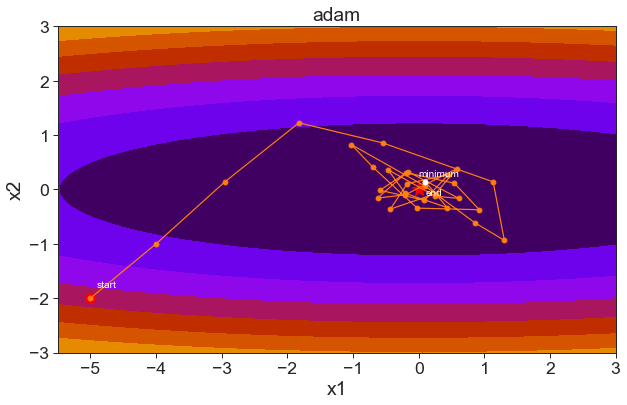

In [37]:
# 无论 lr 以及 第一个参数如何选择，减小第二个参数 beta2, 总会使更新轨迹变得更加曲折。
# 所以最好的选择是使用比较大的 beta2 (=0.99)。
visualize_adam(lr=1, beta1=0.5, beta2=0.14)

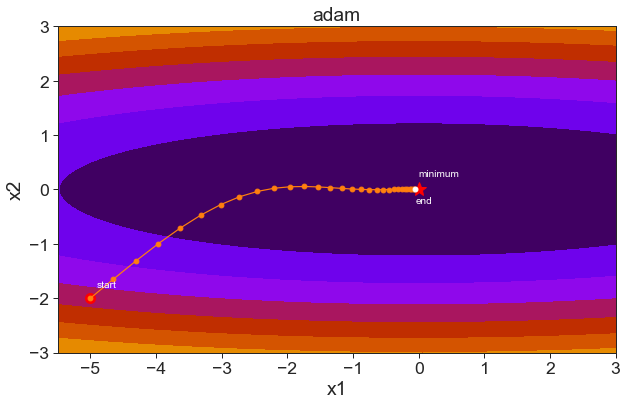

In [38]:
# 固定 beta1 和 beta2, 无论 lr 选 1 还是 0.35, 系统都能在有限步内走到极小值附近。
# Adam 表现出良好的特性，一方面对学习率不敏感，另一方面非常稳定。
visualize_adam(lr=0.35, beta1=0.5, beta2=0.99)